In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import ydata_profiling
import numpy as np
from sklearn.svm import OneClassSVM
def parser(date_string):
    return datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
data = pd.read_csv('data.csv', sep = ';', parse_dates=['DateTime'], date_parser=parser)
data = data.replace(',','.', regex=True)
data['WR 1 20KTL Output (kWh)'] = data['WR 1 20KTL Output (kWh)'].astype(float)
data['WR 1 20KTL Temperature (°C)'] = data['WR 1 20KTL Temperature (°C)'].astype(float)
print(data)



               DateTime  WR 1 20KTL Output (kWh)  WR 1 20KTL Temperature (°C)
0   2023-07-01 00:00:00                     0.00                         0.00
1   2023-07-01 01:00:00                     0.00                         0.00
2   2023-07-01 02:00:00                     0.00                         0.00
3   2023-07-01 03:00:00                     0.00                         0.00
4   2023-07-01 04:00:00                     0.00                         0.00
..                  ...                      ...                          ...
293 2023-07-13 05:00:00                     0.01                        12.93
294 2023-07-13 06:00:00                     0.43                        23.25
295 2023-07-13 07:00:00                     2.64                        25.15
296 2023-07-13 08:00:00                     6.13                        27.89
297 2023-07-13 09:00:00                    11.15                        29.80

[298 rows x 3 columns]


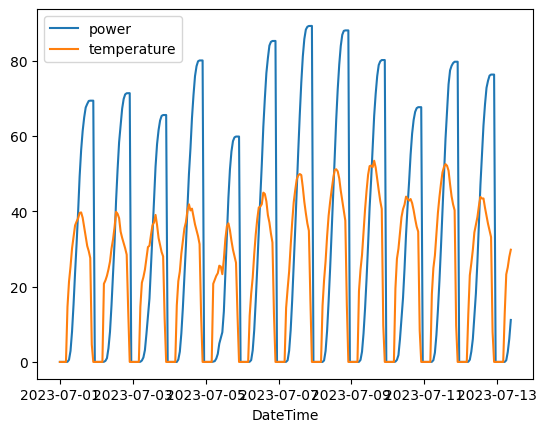

In [39]:
time = data.drop('DateTime', axis='columns')
plt.plot(data['DateTime'], data['WR 1 20KTL Output (kWh)'], label='power')
plt.plot(data['DateTime'], data['WR 1 20KTL Temperature (°C)'], label='temperature')
plt.legend(loc='best')
plt.xlabel('DateTime')

plt.show()

In [41]:
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
df = data.rename(columns={'WR 1 20KTL Output (kWh)':'Energy', 'WR 1 20KTL Temperature (°C)':'Temperature'})

In [43]:
print(df.head())

             DateTime  Energy  Temperature
0 2023-07-01 00:00:00     0.0          0.0
1 2023-07-01 01:00:00     0.0          0.0
2 2023-07-01 02:00:00     0.0          0.0
3 2023-07-01 03:00:00     0.0          0.0
4 2023-07-01 04:00:00     0.0          0.0


In [73]:
df.set_index('DateTime', inplace=True)
train= df.loc['2023-07-01 00:00:00':'2023-07-01 23:00:00','Energy']
#train['label'] = 'True'
print(train)
#plt.plot(train['DateTime'],train['Energy'])
#plt.show()


KeyError: "None of ['DateTime'] are in the columns"

In [67]:
pattern = np.array(train).reshape(-1,1)
print(pattern)

[[0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [4.000e-02]
 [5.700e-01]
 [2.930e+00]
 [8.080e+00]
 [1.530e+01]
 [2.366e+01]
 [3.136e+01]
 [3.982e+01]
 [4.924e+01]
 [5.628e+01]
 [6.134e+01]
 [6.494e+01]
 [6.757e+01]
 [6.852e+01]
 [6.931e+01]
 [6.939e+01]
 [6.939e+01]
 [6.939e+01]
 [0.000e+00]]


In [68]:
clf = OneClassSVM(gamma='scale').fit(pattern)
test = df.loc[df['DateTime']>datetime(2023,7,2), 'Energy']
print(test)

25      0.00
26      0.00
27      0.00
28      0.00
29      0.04
       ...  
293     0.01
294     0.43
295     2.64
296     6.13
297    11.15
Name: Energy, Length: 273, dtype: float64
